In [40]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed


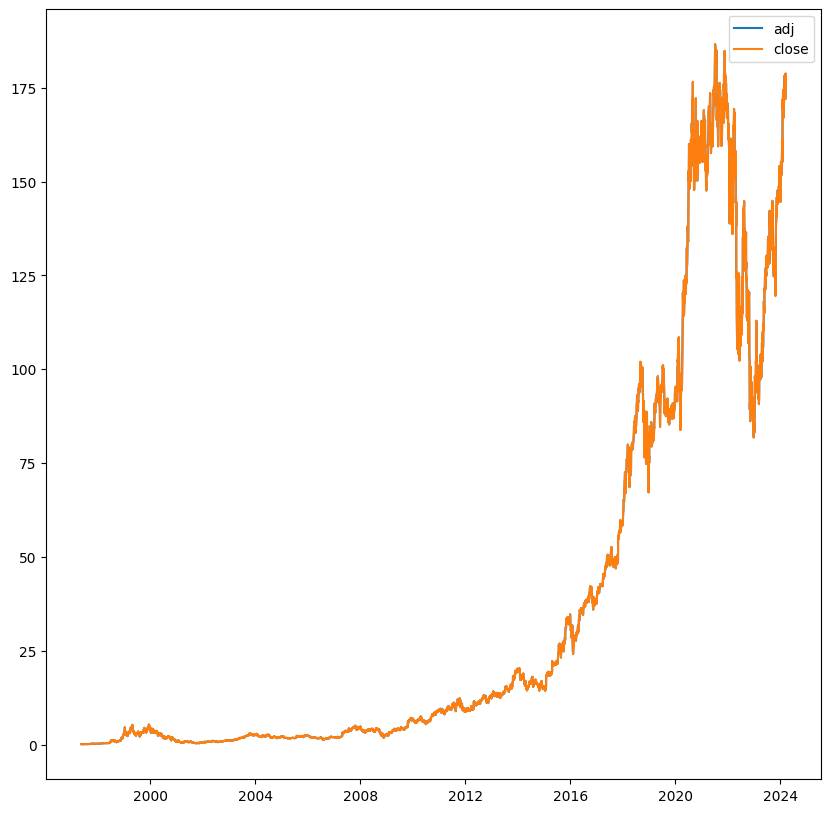

In [62]:
data = yf.download("AMZN", period="max", interval="1d")

plt.figure(figsize=(10, 10))
plt.plot(data["Adj Close"], label="adj")
plt.plot(data["Close"], label="close")
plt.legend()

In [63]:
from copy import deepcopy as dc

def time_steps(data, steps):
    df = dc(data)

    for i in range(1, steps + 1):
        df[f'Close(t - {i})'] = df['Close'].shift(i)

    df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], inplace=True)
    return df

shifted_df = time_steps(data, 7)
shifted_df

,Close,Close(t - 1),Close(t - 2),Close(t - 3),Close(t - 4),Close(t - 5),Close(t - 6),Close(t - 7)
Date,,,,,,,,
1997-05-15,0.097917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-16,0.086458,0.097917,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-19,0.085417,0.086458,0.097917,NaN,NaN,NaN,NaN,NaN
1997-05-20,0.081771,0.085417,0.086458,0.097917,NaN,NaN,NaN,NaN
1997-05-21,0.071354,0.081771,0.085417,0.086458,0.097917,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-03-13,176.559998,175.389999,171.960007,175.350006,176.820007,173.509995,174.119995,177.580002
2024-03-14,178.750000,176.559998,175.389999,171.960007,175.350006,176.820007,173.509995,174.119995
2024-03-15,174.419998,178.750000,176.559998,175.389999,171.960007,175.350006,176.820007,173.509995
